# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [19]:
# Import libraries
import numpy as np
import pandas as pd

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows',None)

In [20]:
data = pd.read_csv('Pokemon.csv')
data

#                       Name    Type 1    Type 2  Total   HP  Attack  \
0      1                  Bulbasaur     Grass    Poison    318   45      49   
1      2                    Ivysaur     Grass    Poison    405   60      62   
2      3                   Venusaur     Grass    Poison    525   80      82   
3      3      VenusaurMega Venusaur     Grass    Poison    625   80     100   
4      4                 Charmander      Fire       NaN    309   39      52   
5      5                 Charmeleon      Fire       NaN    405   58      64   
6      6                  Charizard      Fire    Flying    534   78      84   
7      6  CharizardMega Charizard X      Fire    Dragon    634   78     130   
8      6  CharizardMega Charizard Y      Fire    Flying    634   78     104   
9      7                   Squirtle     Water       NaN    314   44      48   
10     8                  Wartortle     Water       NaN    405   59      63   
11     9                  Blastoise     Water       NaN    530   79      83   
12     9    BlastoiseMega Blastoise     Water       NaN    630   79     103   
13    10                   Caterpie       Bug       NaN    195   45      30   
14    11                    Metapod       Bug       NaN    205   50      20   
15    12                 Butterfree       Bug    Flying    395   60      45   
16    13                     Weedle       Bug    Poison    195   40      35   
17    14                     Kakuna       Bug    Poison    205   45      25   
18    15                   Beedrill       Bug    Poison    395   65      90   
19    15      BeedrillMega Beedrill       Bug    Poison    495   65     150   
20    16                     Pidgey    Normal    Flying    251   40      45   
21    17                  Pidgeotto    Normal    Flying    349   63      60   
22    18                    Pidgeot    Normal    Flying    479   83      80   
23    18        PidgeotMega Pidgeot    Normal    Flying    579   83      80   
24    19                    Rattata    Normal       NaN    253   30      56   
25    20                   Raticate    Normal       NaN    413   55      81   
26    21                    Spearow    Normal    Flying    262   40      60   
27    22                     Fearow    Normal    Flying    442   65      90   
28    23                      Ekans    Poison       NaN    288   35      60   
29    24                      Arbok    Poison       NaN    438   60      85   
30    25                    Pikachu  Electric       NaN    320   35      55   
31    26                     Raichu  Electric       NaN    485   60      90   
32    27                  Sandshrew    Ground       NaN    300   50      75   
33    28                  Sandslash    Ground       NaN    450   75     100   
34    29                   Nidoran♀    Poison       NaN    275   55      47   
35    30                   Nidorina    Poison       NaN    365   70      62   
36    31                  Nidoqueen    Poison    Ground    505   90      92   
37    32                   Nidoran♂    Poison       NaN    273   46      57   
38    33                   Nidorino    Poison       NaN    365   61      72   
39    34                   Nidoking    Poison    Ground    505   81     102   
40    35                   Clefairy     Fairy       NaN    323   70      45   
41    36                   Clefable     Fairy       NaN    483   95      70   
42    37                     Vulpix      Fire       NaN    299   38      41   
43    38                  Ninetales      Fire       NaN    505   73      76   
44    39                 Jigglypuff    Normal     Fairy    270  115      45   
45    40                 Wigglytuff    Normal     Fairy    435  140      70   
46    41                      Zubat    Poison    Flying    245   40      45   
47    42                     Golbat    Poison    Flying    455   75      80   
48    43                     Oddish     Grass    Poison    320   45      50   
49    44                      Gloom     Grass    Poison  

From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [4]:
# Total is the sum of HP, Attack, Defense, Sp. Atk, Sp. Def and Speed

data['val_hyp']=data.iloc[:,5:11].sum(axis=1)
data

#                       Name    Type 1    Type 2  Total   HP  Attack  \
0      1                  Bulbasaur     Grass    Poison    318   45      49   
1      2                    Ivysaur     Grass    Poison    405   60      62   
2      3                   Venusaur     Grass    Poison    525   80      82   
3      3      VenusaurMega Venusaur     Grass    Poison    625   80     100   
4      4                 Charmander      Fire       NaN    309   39      52   
5      5                 Charmeleon      Fire       NaN    405   58      64   
6      6                  Charizard      Fire    Flying    534   78      84   
7      6  CharizardMega Charizard X      Fire    Dragon    634   78     130   
8      6  CharizardMega Charizard Y      Fire    Flying    634   78     104   
9      7                   Squirtle     Water       NaN    314   44      48   
10     8                  Wartortle     Water       NaN    405   59      63   
11     9                  Blastoise     Water       NaN    530   79      83   
12     9    BlastoiseMega Blastoise     Water       NaN    630   79     103   
13    10                   Caterpie       Bug       NaN    195   45      30   
14    11                    Metapod       Bug       NaN    205   50      20   
15    12                 Butterfree       Bug    Flying    395   60      45   
16    13                     Weedle       Bug    Poison    195   40      35   
17    14                     Kakuna       Bug    Poison    205   45      25   
18    15                   Beedrill       Bug    Poison    395   65      90   
19    15      BeedrillMega Beedrill       Bug    Poison    495   65     150   
20    16                     Pidgey    Normal    Flying    251   40      45   
21    17                  Pidgeotto    Normal    Flying    349   63      60   
22    18                    Pidgeot    Normal    Flying    479   83      80   
23    18        PidgeotMega Pidgeot    Normal    Flying    579   83      80   
24    19                    Rattata    Normal       NaN    253   30      56   
25    20                   Raticate    Normal       NaN    413   55      81   
26    21                    Spearow    Normal    Flying    262   40      60   
27    22                     Fearow    Normal    Flying    442   65      90   
28    23                      Ekans    Poison       NaN    288   35      60   
29    24                      Arbok    Poison       NaN    438   60      85   
30    25                    Pikachu  Electric       NaN    320   35      55   
31    26                     Raichu  Electric       NaN    485   60      90   
32    27                  Sandshrew    Ground       NaN    300   50      75   
33    28                  Sandslash    Ground       NaN    450   75     100   
34    29                   Nidoran♀    Poison       NaN    275   55      47   
35    30                   Nidorina    Poison       NaN    365   70      62   
36    31                  Nidoqueen    Poison    Ground    505   90      92   
37    32                   Nidoran♂    Poison       NaN    273   46      57   
38    33                   Nidorino    Poison       NaN    365   61      72   
39    34                   Nidoking    Poison    Ground    505   81     102   
40    35                   Clefairy     Fairy       NaN    323   70      45   
41    36                   Clefable     Fairy       NaN    483   95      70   
42    37                     Vulpix      Fire       NaN    299   38      41   
43    38                  Ninetales      Fire       NaN    505   73      76   
44    39                 Jigglypuff    Normal     Fairy    270  115      45   
45    40                 Wigglytuff    Normal     Fairy    435  140      70   
46    41                      Zubat    Poison    Flying    245   40      45   
47    42                     Golbat    Poison    Flying    455   75      80   
48    43                     Oddish     Grass    Poison    320   45      50   
49    44                      Gloom     Grass    Poison  

In [5]:
# Checking all values in both columns match
data['Total'].unique() == data['val_hyp'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [6]:
# Once the hypothesis confirmed, column val_hyp to be removed.
data = data.drop(['val_hyp'], axis=1)
data

#                       Name    Type 1    Type 2  Total   HP  Attack  \
0      1                  Bulbasaur     Grass    Poison    318   45      49   
1      2                    Ivysaur     Grass    Poison    405   60      62   
2      3                   Venusaur     Grass    Poison    525   80      82   
3      3      VenusaurMega Venusaur     Grass    Poison    625   80     100   
4      4                 Charmander      Fire       NaN    309   39      52   
5      5                 Charmeleon      Fire       NaN    405   58      64   
6      6                  Charizard      Fire    Flying    534   78      84   
7      6  CharizardMega Charizard X      Fire    Dragon    634   78     130   
8      6  CharizardMega Charizard Y      Fire    Flying    634   78     104   
9      7                   Squirtle     Water       NaN    314   44      48   
10     8                  Wartortle     Water       NaN    405   59      63   
11     9                  Blastoise     Water       NaN    530   79      83   
12     9    BlastoiseMega Blastoise     Water       NaN    630   79     103   
13    10                   Caterpie       Bug       NaN    195   45      30   
14    11                    Metapod       Bug       NaN    205   50      20   
15    12                 Butterfree       Bug    Flying    395   60      45   
16    13                     Weedle       Bug    Poison    195   40      35   
17    14                     Kakuna       Bug    Poison    205   45      25   
18    15                   Beedrill       Bug    Poison    395   65      90   
19    15      BeedrillMega Beedrill       Bug    Poison    495   65     150   
20    16                     Pidgey    Normal    Flying    251   40      45   
21    17                  Pidgeotto    Normal    Flying    349   63      60   
22    18                    Pidgeot    Normal    Flying    479   83      80   
23    18        PidgeotMega Pidgeot    Normal    Flying    579   83      80   
24    19                    Rattata    Normal       NaN    253   30      56   
25    20                   Raticate    Normal       NaN    413   55      81   
26    21                    Spearow    Normal    Flying    262   40      60   
27    22                     Fearow    Normal    Flying    442   65      90   
28    23                      Ekans    Poison       NaN    288   35      60   
29    24                      Arbok    Poison       NaN    438   60      85   
30    25                    Pikachu  Electric       NaN    320   35      55   
31    26                     Raichu  Electric       NaN    485   60      90   
32    27                  Sandshrew    Ground       NaN    300   50      75   
33    28                  Sandslash    Ground       NaN    450   75     100   
34    29                   Nidoran♀    Poison       NaN    275   55      47   
35    30                   Nidorina    Poison       NaN    365   70      62   
36    31                  Nidoqueen    Poison    Ground    505   90      92   
37    32                   Nidoran♂    Poison       NaN    273   46      57   
38    33                   Nidorino    Poison       NaN    365   61      72   
39    34                   Nidoking    Poison    Ground    505   81     102   
40    35                   Clefairy     Fairy       NaN    323   70      45   
41    36                   Clefable     Fairy       NaN    483   95      70   
42    37                     Vulpix      Fire       NaN    299   38      41   
43    38                  Ninetales      Fire       NaN    505   73      76   
44    39                 Jigglypuff    Normal     Fairy    270  115      45   
45    40                 Wigglytuff    Normal     Fairy    435  140      70   
46    41                      Zubat    Poison    Flying    245   40      45   
47    42                     Golbat    Poison    Flying    455   75      80   
48    43                     Oddish     Grass    Poison    320   45      50   
49    44                      Gloom     Grass    Poison  

## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [7]:
# Splitting 'y' and 'X' 
# Not sure whether I should be doing the Xy split in this exercise, but it has been said several times that this step
# must be carried out before splitting into numerical and categorical.

X=data.drop(['Total'], axis=1)
y=data['Total']

In [8]:
# Splitting numerical values from categorical values.
numerical = X.select_dtypes(np.number)
numerical.head()

#  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0  1  45      49       49       65       65     45           1
1  2  60      62       63       80       80     60           1
2  3  80      82       83      100      100     80           1
3  3  80     100      123      122      120     80           1
4  4  39      52       43       60       50     65           1

In [12]:
# Splitting categorical values from numerical values.
categorical = X.select_dtypes(object)
categorical.head()
name = categorical.drop(['Type 1', 'Type 2'], axis = 1) # Will not convert Pokemon names into categorical values. Storing column into a different variable.
categorical = categorical.drop(['Name'], axis = 1)

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(categorical)
encoded_for_p = encoder.transform(categorical).toarray()
encoded_for_p
display(encoder.categories_)
cols = [colname for row in encoder.categories_ for colname in row]
display(cols)
cat_num = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
cat_num = cat_num.drop(cols_to_drop,axis=1)
display(cat_num)

[array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
        'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
        'Psychic', 'Rock', 'Steel', 'Water'], dtype=object),
 array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
        'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
        'Psychic', 'Rock', 'Steel', 'Water', nan], dtype=object)]

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water',
 'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water',
 nan]

Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  Grass  \
0     0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    1.0   
1     0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    1.0   
2     0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    1.0   
3     0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    1.0   
4     0.0     0.0       0.0    0.0       0.0   1.0     0.0    0.0    0.0   
5     0.0     0.0       0.0    0.0       0.0   1.0     0.0    0.0    0.0   
6     0.0     0.0       0.0    0.0       0.0   1.0     0.0    0.0    0.0   
7     0.0     0.0       0.0    0.0       0.0   1.0     0.0    0.0    0.0   
8     0.0     0.0       0.0    0.0       0.0   1.0     0.0    0.0    0.0   
9     0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
10    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
11    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
12    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
13    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
14    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
15    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
16    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
17    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
18    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
19    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
20    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
21    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
22    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
23    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
24    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
25    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
26    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
27    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
28    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
29    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
30    0.0     0.0       1.0    0.0       0.0   0.0     0.0    0.0    0.0   
31    0.0     0.0       1.0    0.0       0.0   0.0     0.0    0.0    0.0   
32    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
33    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
34    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
35    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
36    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
37    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
38    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
39    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
40    0.0     0.0       0.0    1.0       0.0   0.0     0.0    0.0    0.0   
41    0.0     0.0       0.0    1.0       0.0   0.0     0.0    0.0    0.0   
42    0.0     0.0       0.0    0.0       0.0   1.0     0.0    0.0    0.0   
43    0.0     0.0       0.0    0.0       0.0   1.0     0.0    0.0    0.0   
44    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
45    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
46    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
47    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    0.0   
48    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    1.0   
49    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    1.0   
50    0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0    1.0   
51    0.0     0.0       0.0    0.0       0.0   0.0   

## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [17]:
multic = pd.concat([name, cat_num, y], axis=1)
multic.reset_index().head()

index                   Name  Dark  Dragon  Electric  Fairy  Fighting  \
0      0              Bulbasaur   0.0     0.0       0.0    0.0       0.0   
1      1                Ivysaur   0.0     0.0       0.0    0.0       0.0   
2      2               Venusaur   0.0     0.0       0.0    0.0       0.0   
3      3  VenusaurMega Venusaur   0.0     0.0       0.0    0.0       0.0   
4      4             Charmander   0.0     0.0       0.0    0.0       0.0   

   Fire  Flying  Ghost  Grass  Ground  Ice  Normal  Poison  Psychic  Rock  \
0   0.0     0.0    0.0    1.0     0.0  0.0     0.0     0.0      0.0   0.0   
1   0.0     0.0    0.0    1.0     0.0  0.0     0.0     0.0      0.0   0.0   
2   0.0     0.0    0.0    1.0     0.0  0.0     0.0     0.0      0.0   0.0   
3   0.0     0.0    0.0    1.0     0.0  0.0     0.0     0.0      0.0   0.0   
4   1.0     0.0    0.0    0.0     0.0  0.0     0.0     0.0      0.0   0.0   

   Steel  Water  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
0    0.0    0.0   0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0   
1    0.0    0.0   0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0   
2    0.0    0.0   0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0   
3    0.0    0.0   0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0   
4    0.0    0.0   0.0     0.0       0.0    0.0       0.0   0.0     0.0    0.0   

   Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  NaN  Total  
0    0.0     0.0  0.0     0.0     1.0      0.0   0.0    0.0    0.0  0.0    318  
1    0.0     0.0  0.0     0.0     1.0      0.0   0.0    0.0    0.0  0.0    405  
2    0.0     0.0  0.0     0.0     1.0      0.0   0.0    0.0    0.0  0.0    525  
3    0.0     0.0  0.0     0.0     1.0      0.0   0.0    0.0    0.0  0.0    625  
4    0.0     0.0  0.0     0.0     0.0      0.0   0.0    0.0    0.0  1.0    309

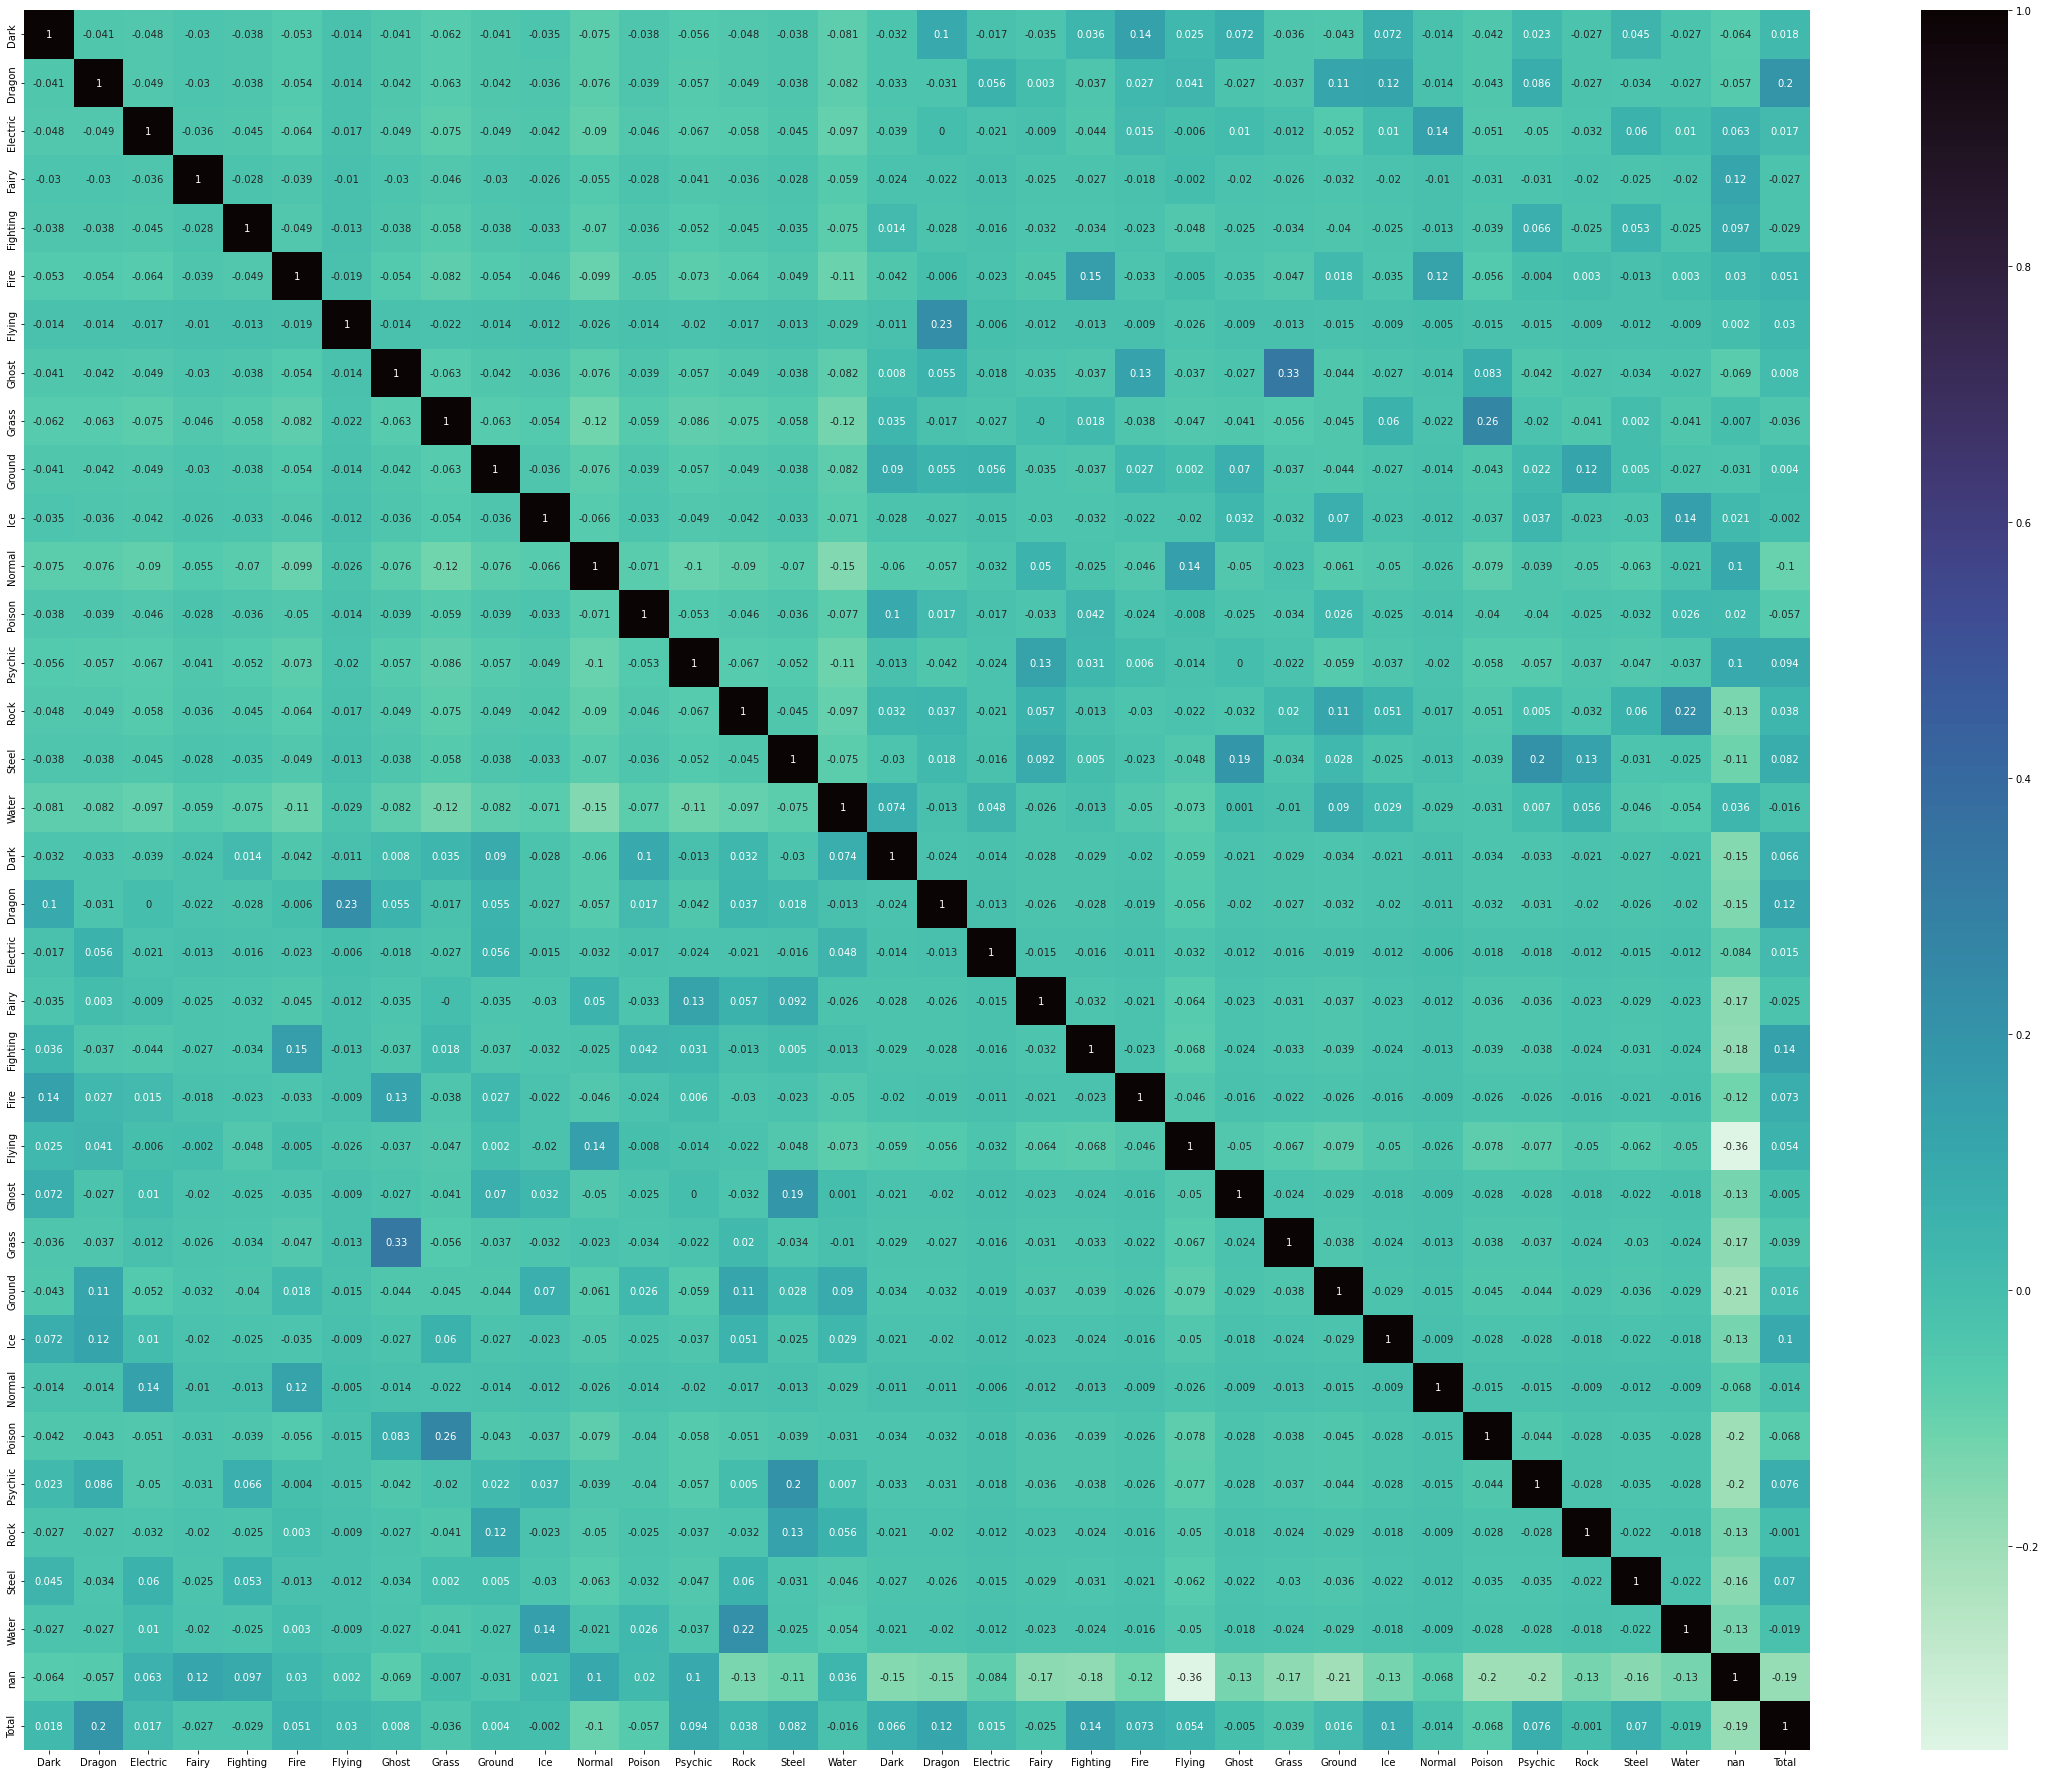

In [18]:
import matplotlib.pyplot as plt
#%matplotlib.inline
import seaborn as sns

fig, ax=plt.subplots(figsize=(40,32)) # Used to set the size of the box. (x axis,y axis)

correlations_matrix = round(multic.corr(),3)
sns.heatmap(correlations_matrix, cmap = 'mako_r', annot=True)
plt.show()

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [74]:
data['Combo Type'] = data['Type 1'] + '-' + data['Type 2']
data['Combo Type'] = data['Combo Type'].fillna(data['Type 1'])
data.head(10)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary    Combo Type  
0       65       65     45           1      False  Grass-Poison  
1       80       80     60           1      False  Grass-Poison  
2      100      100     80           1      False  Grass-Poison  
3      122      120     80           1      False  Grass-Poison  
4       60       50     65           1      False          Fire  
5       80       65     80           1      False          Fire  
6      109       85    100           1      False   Fire-Flying  
7      130       85    100           1      False   Fire-Dragon  
8      159      115    100           1      False   Fire-Flying  
9       50       64     43           1      False         Water

In [79]:
num_combo = data[['Combo Type']]

In [83]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(num_combo)
encoded_for_p = encoder.transform(num_combo).toarray()
encoded_for_p
display(encoder.categories_)
cols = [colname for row in encoder.categories_ for colname in row]
display(cols)
cat_num = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
cat_num = cat_num.drop(cols_to_drop,axis=1)
display(cat_num).head()

[array(['Bug', 'Bug-Electric', 'Bug-Fighting', 'Bug-Fire', 'Bug-Flying',
        'Bug-Ghost', 'Bug-Grass', 'Bug-Ground', 'Bug-Poison', 'Bug-Rock',
        'Bug-Steel', 'Bug-Water', 'Dark', 'Dark-Dragon', 'Dark-Fighting',
        'Dark-Fire', 'Dark-Flying', 'Dark-Ghost', 'Dark-Ice',
        'Dark-Psychic', 'Dark-Steel', 'Dragon', 'Dragon-Electric',
        'Dragon-Fairy', 'Dragon-Fire', 'Dragon-Flying', 'Dragon-Ground',
        'Dragon-Ice', 'Dragon-Psychic', 'Electric', 'Electric-Dragon',
        'Electric-Fairy', 'Electric-Fire', 'Electric-Flying',
        'Electric-Ghost', 'Electric-Grass', 'Electric-Ice',
        'Electric-Normal', 'Electric-Steel', 'Electric-Water', 'Fairy',
        'Fairy-Flying', 'Fighting', 'Fighting-Dark', 'Fighting-Flying',
        'Fighting-Psychic', 'Fighting-Steel', 'Fire', 'Fire-Dragon',
        'Fire-Fighting', 'Fire-Flying', 'Fire-Ground', 'Fire-Normal',
        'Fire-Psychic', 'Fire-Rock', 'Fire-Steel', 'Fire-Water', 'Flying',
        'Flying-Dragon', '

['Bug',
 'Bug-Electric',
 'Bug-Fighting',
 'Bug-Fire',
 'Bug-Flying',
 'Bug-Ghost',
 'Bug-Grass',
 'Bug-Ground',
 'Bug-Poison',
 'Bug-Rock',
 'Bug-Steel',
 'Bug-Water',
 'Dark',
 'Dark-Dragon',
 'Dark-Fighting',
 'Dark-Fire',
 'Dark-Flying',
 'Dark-Ghost',
 'Dark-Ice',
 'Dark-Psychic',
 'Dark-Steel',
 'Dragon',
 'Dragon-Electric',
 'Dragon-Fairy',
 'Dragon-Fire',
 'Dragon-Flying',
 'Dragon-Ground',
 'Dragon-Ice',
 'Dragon-Psychic',
 'Electric',
 'Electric-Dragon',
 'Electric-Fairy',
 'Electric-Fire',
 'Electric-Flying',
 'Electric-Ghost',
 'Electric-Grass',
 'Electric-Ice',
 'Electric-Normal',
 'Electric-Steel',
 'Electric-Water',
 'Fairy',
 'Fairy-Flying',
 'Fighting',
 'Fighting-Dark',
 'Fighting-Flying',
 'Fighting-Psychic',
 'Fighting-Steel',
 'Fire',
 'Fire-Dragon',
 'Fire-Fighting',
 'Fire-Flying',
 'Fire-Ground',
 'Fire-Normal',
 'Fire-Psychic',
 'Fire-Rock',
 'Fire-Steel',
 'Fire-Water',
 'Flying',
 'Flying-Dragon',
 'Ghost',
 'Ghost-Dark',
 'Ghost-Dragon',
 'Ghost-Fire',
 'Gho

Bug-Electric  Bug-Fighting  Bug-Fire  Bug-Flying  Bug-Ghost  Bug-Grass  \
0             0.0           0.0       0.0         0.0        0.0        0.0   
1             0.0           0.0       0.0         0.0        0.0        0.0   
2             0.0           0.0       0.0         0.0        0.0        0.0   
3             0.0           0.0       0.0         0.0        0.0        0.0   
4             0.0           0.0       0.0         0.0        0.0        0.0   
5             0.0           0.0       0.0         0.0        0.0        0.0   
6             0.0           0.0       0.0         0.0        0.0        0.0   
7             0.0           0.0       0.0         0.0        0.0        0.0   
8             0.0           0.0       0.0         0.0        0.0        0.0   
9             0.0           0.0       0.0         0.0        0.0        0.0   
10            0.0           0.0       0.0         0.0        0.0        0.0   
11            0.0           0.0       0.0         0.0        0.0        0.0   
12            0.0           0.0       0.0         0.0        0.0        0.0   
13            0.0           0.0       0.0         0.0        0.0        0.0   
14            0.0           0.0       0.0         0.0        0.0        0.0   
15            0.0           0.0       0.0         1.0        0.0        0.0   
16            0.0           0.0       0.0         0.0        0.0        0.0   
17            0.0           0.0       0.0         0.0        0.0        0.0   
18            0.0           0.0       0.0         0.0        0.0        0.0   
19            0.0           0.0       0.0         0.0        0.0        0.0   
20            0.0           0.0       0.0         0.0        0.0        0.0   
21            0.0           0.0       0.0         0.0        0.0        0.0   
22            0.0           0.0       0.0         0.0        0.0        0.0   
23            0.0           0.0       0.0         0.0        0.0        0.0   
24            0.0           0.0       0.0         0.0        0.0        0.0   
25            0.0           0.0       0.0         0.0        0.0        0.0   
26            0.0           0.0       0.0         0.0        0.0        0.0   
27            0.0           0.0       0.0         0.0        0.0        0.0   
28            0.0           0.0       0.0         0.0        0.0        0.0   
29            0.0           0.0       0.0         0.0        0.0        0.0   
30            0.0           0.0       0.0         0.0        0.0        0.0   
31            0.0           0.0       0.0         0.0        0.0        0.0   
32            0.0           0.0       0.0         0.0        0.0        0.0   
33            0.0           0.0       0.0         0.0        0.0        0.0   
34            0.0           0.0       0.0         0.0        0.0        0.0   
35            0.0           0.0       0.0         0.0        0.0        0.0   
36            0.0           0.0       0.0         0.0        0.0        0.0   
37            0.0           0.0       0.0         0.0        0.0        0.0   
38            0.0           0.0       0.0         0.0        0.0        0.0   
39            0.0           0.0       0.0         0.0        0.0        0.0   
40            0.0           0.0       0.0         0.0        0.0        0.0   
41            0.0           0.0       0.0         0.0        0.0        0.0   
42            0.0           0.0       0.0         0.0        0.0        0.0   
43            0.0           0.0       0.0         0.0        0.0        0.0   
44            0.0           0.0       0.0         0.0        0.0        0.0   
45            0.0           0.0       0.0         0.0        0.0        0.0   
46            0.0           0.0       0.0         0.0        0.0        0.0   
47            0.0           0.0       0.0         0.0        0.0        0.0   
48            0.0           0.0       0.0         0.0        0.0        0.0   
49            0.0           0.0       0.0         0.0  

AttributeError: 'NoneType' object has no attribute 'head'

In [81]:
multic_combo = pd.concat([name, cat_num, y], axis=1)
multic_combo.reset_index().head()

index                   Name  Bug-Electric  Bug-Fighting  Bug-Fire  \
0      0              Bulbasaur           0.0           0.0       0.0   
1      1                Ivysaur           0.0           0.0       0.0   
2      2               Venusaur           0.0           0.0       0.0   
3      3  VenusaurMega Venusaur           0.0           0.0       0.0   
4      4             Charmander           0.0           0.0       0.0   

   Bug-Flying  Bug-Ghost  Bug-Grass  Bug-Ground  Bug-Poison  Bug-Rock  \
0         0.0        0.0        0.0         0.0         0.0       0.0   
1         0.0        0.0        0.0         0.0         0.0       0.0   
2         0.0        0.0        0.0         0.0         0.0       0.0   
3         0.0        0.0        0.0         0.0         0.0       0.0   
4         0.0        0.0        0.0         0.0         0.0       0.0   

   Bug-Steel  Bug-Water  Dark  Dark-Dragon  Dark-Fighting  Dark-Fire  \
0        0.0        0.0   0.0          0.0            0.0        0.0   
1        0.0        0.0   0.0          0.0            0.0        0.0   
2        0.0        0.0   0.0          0.0            0.0        0.0   
3        0.0        0.0   0.0          0.0            0.0        0.0   
4        0.0        0.0   0.0          0.0            0.0        0.0   

   Dark-Flying  Dark-Ghost  Dark-Ice  Dark-Psychic  Dark-Steel  Dragon  \
0          0.0         0.0       0.0           0.0         0.0     0.0   
1          0.0         0.0       0.0           0.0         0.0     0.0   
2          0.0         0.0       0.0           0.0         0.0     0.0   
3          0.0         0.0       0.0           0.0         0.0     0.0   
4          0.0         0.0       0.0           0.0         0.0     0.0   

   Dragon-Electric  Dragon-Fairy  Dragon-Fire  Dragon-Flying  Dragon-Ground  \
0              0.0           0.0          0.0            0.0            0.0   
1              0.0           0.0          0.0            0.0            0.0   
2              0.0           0.0          0.0            0.0            0.0   
3              0.0           0.0          0.0            0.0            0.0   
4              0.0           0.0          0.0            0.0            0.0   

   Dragon-Ice  Dragon-Psychic  Electric  Electric-Dragon  Electric-Fairy  \
0         0.0             0.0       0.0              0.0             0.0   
1         0.0             0.0       0.0              0.0             0.0   
2         0.0             0.0       0.0              0.0             0.0   
3         0.0             0.0       0.0              0.0             0.0   
4         0.0             0.0       0.0              0.0             0.0   

   Electric-Fire  Electric-Flying  Electric-Ghost  Electric-Grass  \
0            0.0              0.0             0.0             0.0   
1            0.0              0.0             0.0             0.0   
2            0.0              0.0             0.0             0.0   
3            0.0              0.0             0.0             0.0   
4            0.0              0.0             0.0             0.0   

   Electric-Ice  Electric-Normal  Electric-Steel  Electric-Water  Fairy  \
0           0.0              0.0             0.0             0.0    0.0   
1           0.0              0.0             0.0             0.0    0.0   
2           0.0              0.0             0.0             0.0    0.0   
3           0.0              0.0             0.0             0.0    0.0   
4           0.0              0.0             0.0             0.0    0.0   

   Fairy-Flying  Fighting  Fighting-Dark  Fighting-Flying  Fighting-Psychic  \
0           0.0       0.0            0.0              0.0               0.0   
1           0.0       0.0            0.0              0.0               0.0   
2           0.0       0.0            0.0              0.0               0.0   
3           0.0       0.0            0.0              0.0               0.0   
4           0.0       0.0            0.0              

In [82]:
fig, ax=plt.subplots(figsize=(40,32)) # Used to set the size of the box. (x axis,y axis)

correlations_matrix = round(multic_combo.corr(),3)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

KeyboardInterrupt: 